[[184, 36, 6, 6, 18], [183, 7, 7, 7, 16], [236, 825, 450, 90, 24], [635, 971, 60, 60, 96], [276, 1624, 201, 94, 26], [3772, 709, 195, 212, 1479], [670, 82, 82, 44, 24], [1560, 655, 655, 655, 655]]


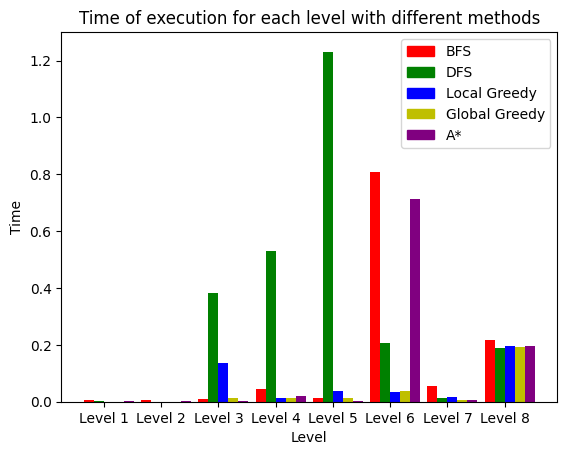

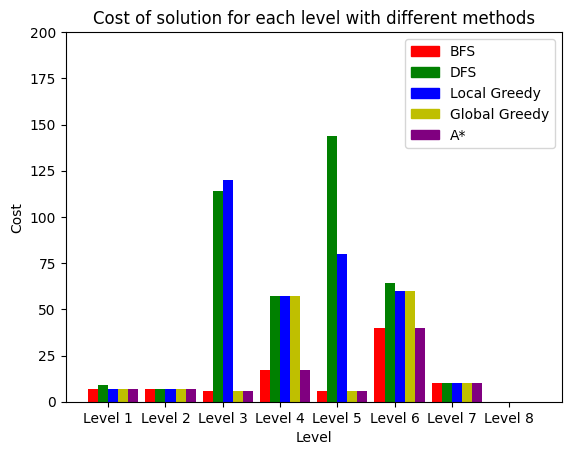

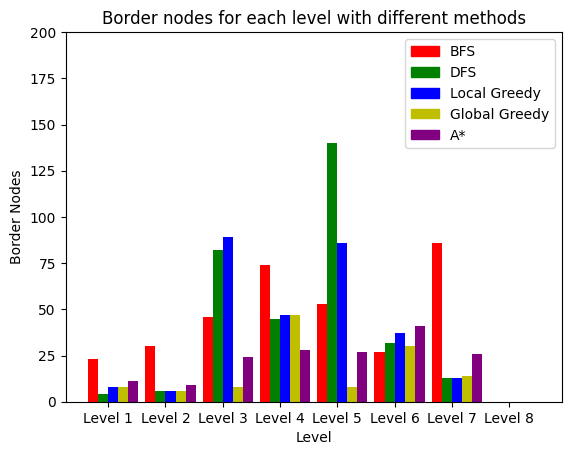

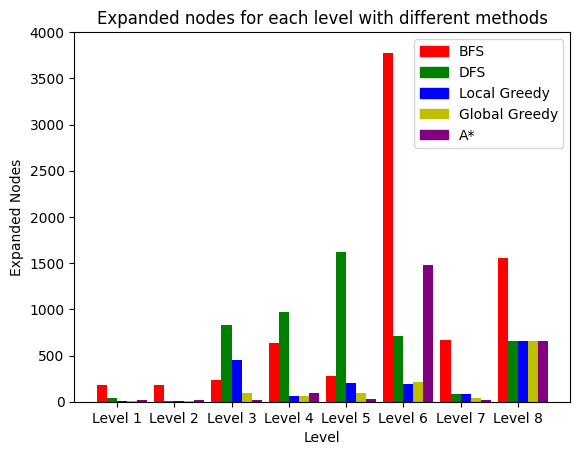

In [24]:
from TP1.utils import heuristics
from TP1.utils.process_map import process_map, read_file
from TP1.utils.graph_utils import *
from TP1.utils.heuristics import *
from TP1.utils.algorithms_utils import generate_children_sokoban
from TP1.utils.algorithms import bfs, dfs, global_greedy, local_greedy, astar
import time
import numpy as np

uninformed_methods = [bfs, dfs]
informed_methods = [local_greedy, global_greedy, astar]
data_time = []
cost = []
border_nodes = []
expanded_nodes=[]
for i in range(1, 9):
    level_time = []
    level_cost = []
    level_borders = []
    level_expanded = []
    state,start =process_map(read_file("./Levels/level" + str(i) + ".txt"))

    for method in uninformed_methods:
        start_time = time.time()
        response = method(state, start, generate_children_sokoban)
        level_time.append(time.time() - start_time)
        if response["status"] == "Failure":
            level_cost.append(0)
        else:
            level_cost.append(response["cost"])
        level_borders.append(response["border"])
        level_expanded.append(response["expanded_nodes"])
    for method in informed_methods:
        start_time = time.time()
        response = method(state, start, generate_children_sokoban, manhattan_heuristic)
        level_time.append(time.time() - start_time)        
        if response["status"] == "Failure":
            level_cost.append(0)
        else:
            level_cost.append(response["cost"])
        level_borders.append(response["border"])
        level_expanded.append(response["expanded_nodes"])
    data_time.append(level_time)
    cost.append(level_cost)
    border_nodes.append(level_borders)
    expanded_nodes.append(level_expanded)

groupLabels = ["Level " + str(i) for i in range(1, 9)]
barLabels = ["BFS", "DFS", "Local Greedy", "Global Greedy", "A*"]
xLabel = "Level"
colors = ['r', 'g', 'b', 'y', 'purple'] 

print(expanded_nodes)
#Time graph
level_methods_bar_graph(data_time, 0, 1.3, groupLabels, barLabels, colors, xLabel, "Time (seconds)", "Time of execution for each level with different methods")
level_methods_bar_graph(cost, 0, 200, groupLabels, barLabels, colors, xLabel, "Cost", "Cost of solution for each level with different methods")
level_methods_bar_graph(border_nodes, 0, 200, groupLabels, barLabels, colors, xLabel, "Border Nodes", "Border nodes for each level with different methods")
level_methods_bar_graph(expanded_nodes, 0, 4000, groupLabels, barLabels, colors, xLabel, "Expanded Nodes", "Expanded nodes for each level with different methods")



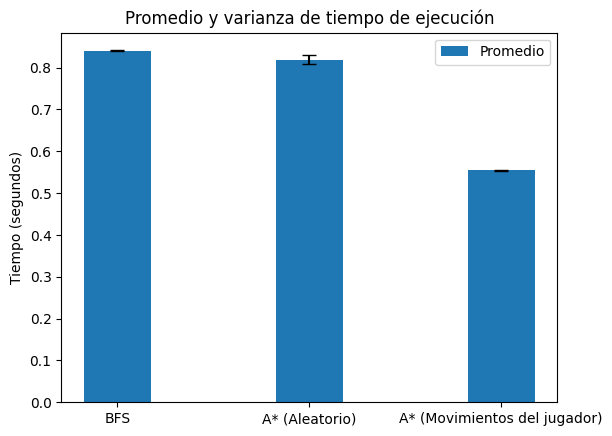

In [25]:

#Random for bfs and dfs
all_times = [[], [], []]
state, start = process_map(read_file("./Levels/level6.txt"))
for i in range(0, 10):
    start_time = time.time()
    bfs(state, start, generate_children_sokoban)
    all_times[0].append(time.time() - start_time)
    start_time = time.time()
    astar(state, start, generate_children_sokoban, rand_heuristic)
    all_times[1].append(time.time() - start_time)
    start_time = time.time()
    astar(state, start, generate_children_sokoban, player_movements_heuristic)
    all_times[2].append(time.time() - start_time)

bfs_times = all_times[0]
astar_rand_times = all_times[1]
astar_player_times = all_times[2]

# Calcular promedios y varianzas
bfs_mean = np.mean(bfs_times)
bfs_variance = np.var(bfs_times)
astar_rand_mean = np.mean(astar_rand_times)
astar_rand_variance = np.var(astar_rand_times)
astar_player_mean = np.mean(astar_player_times)
astar_player_variance = np.var(astar_player_times)
labels = ['BFS', 'A* (Random)', 'A* (Player Movements)']
title = "Average and variance of BFS and A* (random and player movements) execution times"
yLabel = "Time (seconds)"

average_and_variance_graph([bfs_mean, astar_rand_mean, astar_player_mean], [bfs_variance, astar_rand_variance, astar_player_variance], labels, title, yLabel)

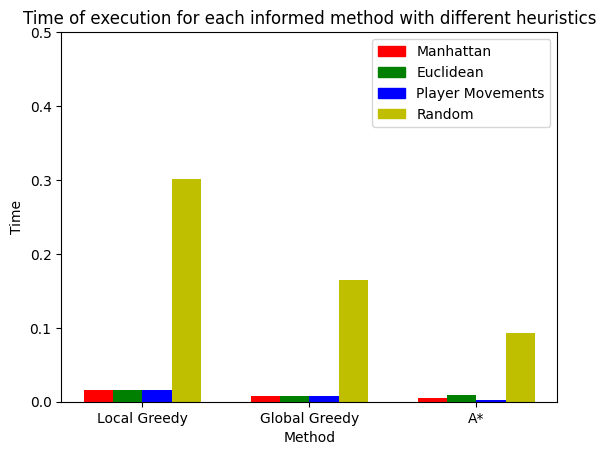

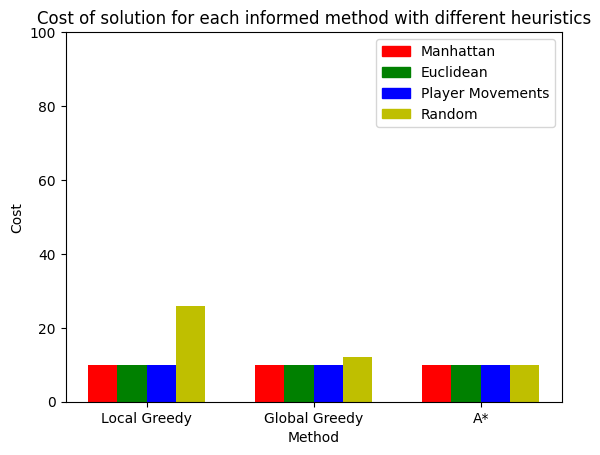

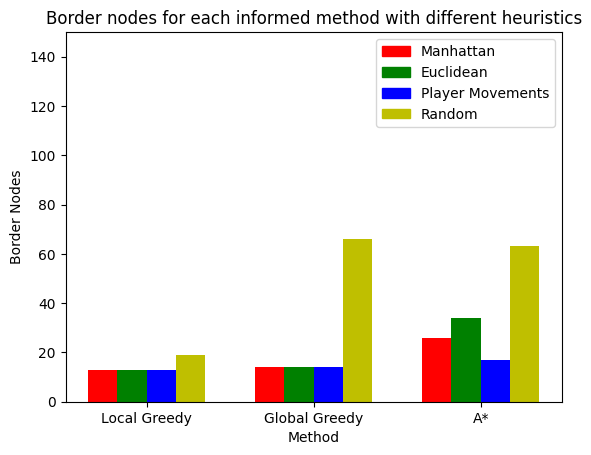

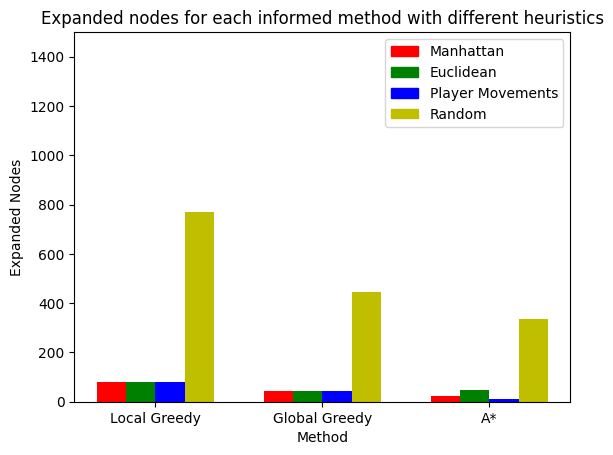

In [26]:
data_time = []
cost = []
border_nodes = []
expanded_nodes=[]
heuristics = [manhattan_heuristic, euclidean_heuristic, player_movements_heuristic, rand_heuristic]


for method in informed_methods:
    level_time = []
    level_cost = []
    level_borders = []
    level_expanded = []
    state,start =process_map(read_file("./Levels/level7.txt"))

    for heuristic in heuristics:
        start_time = time.time()
        response = method(state, start, generate_children_sokoban, heuristic)
        level_time.append(time.time() - start_time)
        if response["status"] == "Failure":
            level_cost.append(0)
        else:
            level_cost.append(response["cost"])
        level_borders.append(response["border"])
        level_expanded.append(response["expanded_nodes"])
    
    data_time.append(level_time)
    cost.append(level_cost)
    border_nodes.append(level_borders)
    expanded_nodes.append(level_expanded)

groupLabels = ["Local Greedy", "Global Greedy", "A*"]
barLabels = ["Manhattan", "Euclidean", "Player Movements", "Random"]
xLabel = "Method"
colors = ['r', 'g', 'b', 'y', 'purple'] 

#Time graph
level_methods_bar_graph(data_time, 0, 0.5, groupLabels, barLabels, colors, xLabel, "Time (seconds)", "Time of execution for each informed method with different heuristics")
level_methods_bar_graph(cost, 0, 100, groupLabels, barLabels, colors, xLabel, "Cost", "Cost of solution for each informed method with different heuristics")
level_methods_bar_graph(border_nodes, 0, 150, groupLabels, barLabels, colors, xLabel, "Border Nodes", "Border nodes for each informed method with different heuristics")
level_methods_bar_graph(expanded_nodes, 0, 1500, groupLabels, barLabels, colors, xLabel, "Expanded Nodes", "Expanded nodes for each informed method with different heuristics")